# Brachistochrone problem

In [1]:
from sympy import *
from sympy.physics import mechanics
mechanics.mechanics_printing()
t = Symbol('t')
y = Function('y')(t)
g = Symbol('g')
C = Symbol('C')

Brachistochrone problem defined by equation shown below

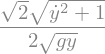

In [2]:
f = sqrt(1 + diff(y)**2) / sqrt(2 * g * y)
f

Then we take the derivative of the equation respect to $y$

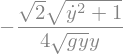

In [3]:
lhs = diff(f, y)
lhs

Then we take the derivative of the equation respect to $y^{'}$

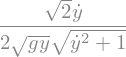

In [4]:
rhs = diff(f, diff(y))
rhs

Now we can substitude both equations from $\sqrt{2g}$

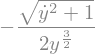

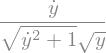

In [5]:
lhs, rhs = lhs.subs(sqrt(g), 1) * sqrt(2), rhs.subs(sqrt(g), 1) * sqrt(2)
display(lhs, rhs)

And now we can build last form of our equation

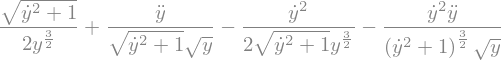

In [6]:
diff(rhs, t) - lhs

Which can be simplified as down below

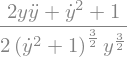

In [7]:
eq1 = (diff(rhs, t) - lhs).simplify()
eq1

We can substitute equation with terms

In [8]:
subs_cons2 = 2 * y**(3/2) * (diff(y, t)**2 + 1)**(3/2)
subs_cons2

And equation forms as this

In [9]:
eq2 = (eq1 * subs_cons2).expand()
eq2

And now if we multiply equation with $y^{'}$

In [10]:
eq3 = ((eq2) * (diff(y, t))).expand()
eq3

Which is derivative of $ C = y {y^{'}}^{2} + y $

In [11]:
eq4 = y + y * diff(y)**2 - C
eq4

If we solve this equation for $y^{'}$ we obtain two equations

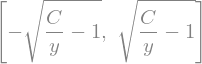

In [12]:
solve(eq4, diff(y))

$y^{'}$ is $\frac{dy}{dx}$ if we solve this equation for $dx$ we get $\sqrt{\frac{y}{C - y}} dy$

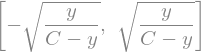

In [13]:
solve(eq4, 1/diff(y))

We only take the positive part of the equation

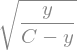

In [14]:
eq5 = solve(eq4, 1/diff(y))[1]
eq5

In this equation we can substitude $y = Csin^{2}(t)$"

In [15]:
subs_par1 = [y,
             C * sin(t)**2]
subs_par1

$\sqrt{\frac{y}{C - y}}$ turns to

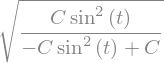

In [16]:
eq5.subs(subs_par1[0], subs_par1[1])

and $dy$ can be written in terms of $dt$

In [17]:
diff(subs_par1[1], t)

Now result is integral of this equation be

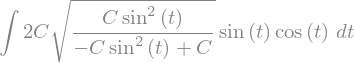

In [18]:
eq6 = eq5.subs(subs_par1[0], subs_par1[1]) * diff(subs_par1[1], t)
display(Integral(eq6, t))

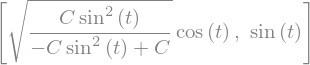

In [19]:
subs_par2 = [sqrt(subs_par1[1] / (C - subs_par1[1])) * cos(t), 
             sin(t)]
subs_par2

If we substitude equation in to simple form it will be equal to

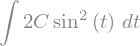

In [20]:
display(Integral(eq6.subs(subs_par2[0], subs_par2[1]), t))

And if we solve integral we get

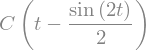

In [21]:
sol_set = [Integral(eq6.subs(subs_par2[0], subs_par2[1]), t).doit().simplify()]
sol_set[0]

Now lets turn to our first substitution and apply some trigonometric substitution

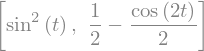

In [22]:
subs_par3 = [sin(t)**2,
             (1 - cos(2*t))/2]
subs_par3

Finally it forms as

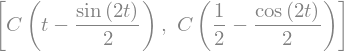

In [23]:
sol_set.append(subs_par1[1].subs(subs_par3[0], subs_par3[1]))
sol_set

Now if we substitude solutions as $C=1$ and $t=\frac{t}{2}$ we get

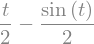

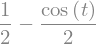

In [24]:
for i in range(len(sol_set)):
    sol_set[i] = sol_set[i].subs([(C, 1), (t, t/2)])
    display(sol_set[i])

This the parametric equation and now if we plot this function

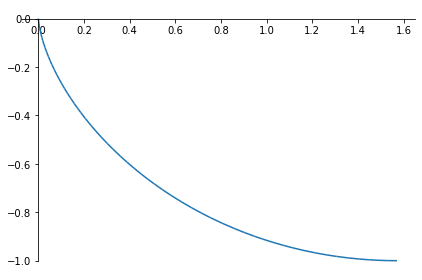

In [25]:
import sympy.plotting as plt
%matplotlib inline
plt.plot_parametric(sol_set[0], -sol_set[1], (t, 0, pi))